In [2]:
# filtrando os dados para tirar os que não estavam presentes, treineiros e redações zeradas
import pandas as pd 

microdados_enem=pd.read_csv('microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv', encoding="latin2", sep=";")

df_filtro_treineiro=microdados_enem['IN_TREINEIRO']==0
df_filtro_presenca_cn =microdados_enem['TP_PRESENCA_CN']==1
df_filtro_presenca_ch =microdados_enem[ 'TP_PRESENCA_CH']==1
df_filtro_presenca_lc =microdados_enem[ 'TP_PRESENCA_LC']==1
df_filtro_presenca_mt =microdados_enem[ 'TP_PRESENCA_MT' ]==1
df_filtro_redacao=microdados_enem['TP_STATUS_REDACAO']!=2

mcdados_filtrado=microdados_enem[df_filtro_presenca_cn & df_filtro_presenca_ch & df_filtro_presenca_lc & df_filtro_presenca_mt  & df_filtro_treineiro & df_filtro_redacao]

mcdados_filtrado.head(10)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
7,210055778089,2022,6,F,1,2,1,1,0,1,...,B,A,A,C,A,A,E,A,A,B
9,210055461467,2022,4,F,1,3,1,1,1,1,...,A,A,A,B,A,A,B,A,A,B
11,210054972570,2022,2,F,1,1,1,2,0,3,...,A,A,A,B,A,A,C,A,A,B
18,210057551883,2022,8,F,1,2,1,1,5,1,...,A,A,A,B,A,A,D,A,A,B
22,210056235859,2022,4,F,1,1,1,1,0,1,...,B,A,A,B,B,A,C,A,B,B
23,210057706656,2022,4,M,1,3,1,1,1,1,...,A,A,A,C,A,A,B,A,A,B
25,210055139127,2022,5,M,1,3,1,1,4,1,...,B,A,A,A,A,A,A,A,A,B
27,210057728624,2022,7,M,1,2,1,1,3,1,...,B,A,A,B,B,A,D,A,B,B


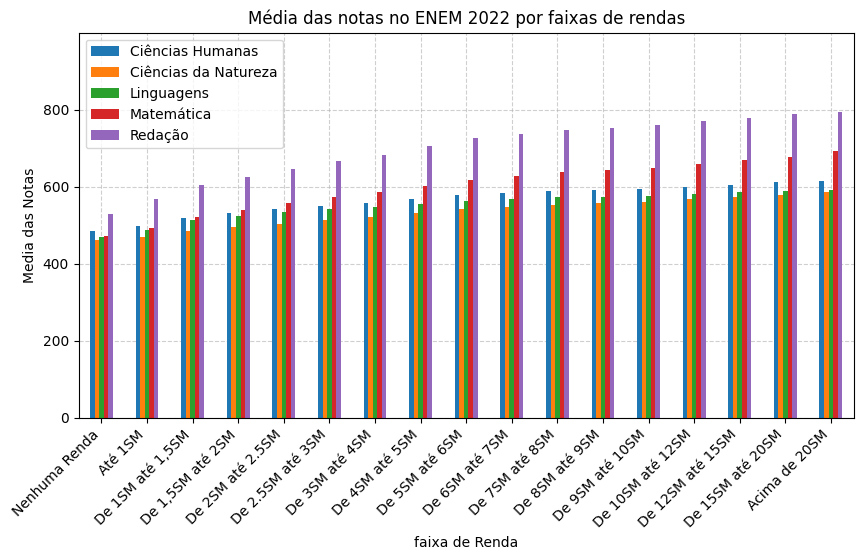

In [49]:
#fazendo a media por renda 
import matplotlib.pyplot as plt
plt.style.use('default')

#pegando as notas e a renda
df_renda=mcdados_filtrado[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q006"]]


medias_por_renda = df_renda.groupby("Q006").mean()


f_rendas = [
    "Nenhuma Renda",
    "Até 1SM",
    "De 1SM até 1,5SM",
    "De 1,5SM até 2SM",
    "De 2SM até 2.5SM",
    "De 2.5SM até 3SM",
    "De 3SM até 4SM",
    "De 4SM até 5SM",
    "De 5SM até 6SM",
    "De 6SM até 7SM",
    "De 7SM até 8SM",
    "De 8SM até 9SM",
    "De 9SM até 10SM",
    "De 10SM até 12SM",
    "De 12SM até 15SM",
    "De 15SM até 20SM",
    "Acima de 20SM"

]


medias_por_renda.plot.bar(stacked=False, figsize=(10,5),zorder=2, ylim=(0,1000))
plt.grid(True,linestyle='--', zorder=1,alpha=0.6)
plt.ylabel("Media das Notas")
plt.xlabel('faixa de Renda')
plt.title("Média das notas no ENEM 2022 por faixas de rendas")
plt.xticks(range(len(f_rendas)),labels=f_rendas, rotation=45, ha='right')
plt.legend(['Ciências Humanas','Ciências da Natureza','Linguagens','Matemática','Redação'])
plt.yticks([0,200,400,600,800])
plt.show()




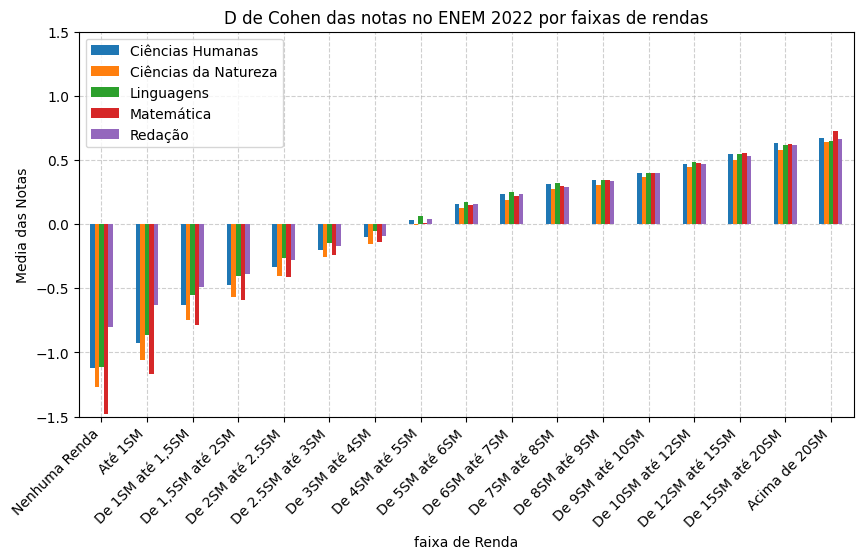

In [58]:
#fazendo o de cohen por renda 
import matplotlib.pyplot as plt
plt.style.use('default')


#pegando as notas e a renda
df_renda=mcdados_filtrado[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q006"]]


#calculando d de cohen
medias_por_renda = df_renda.groupby("Q006").mean()

std_por_renda = df_renda.groupby("Q006").std()

media_total = medias_por_renda.mean()

dcohen = (medias_por_renda - media_total) / std_por_renda





f_rendas = [
    "Nenhuma Renda",
    "Até 1SM",
    "De 1SM até 1,5SM",
    "De 1,5SM até 2SM",
    "De 2SM até 2.5SM",
    "De 2.5SM até 3SM",
    "De 3SM até 4SM",
    "De 4SM até 5SM",
    "De 5SM até 6SM",
    "De 6SM até 7SM",
    "De 7SM até 8SM",
    "De 8SM até 9SM",
    "De 9SM até 10SM",
    "De 10SM até 12SM",
    "De 12SM até 15SM",
    "De 15SM até 20SM",
    "Acima de 20SM"

]

dcohen.plot.bar(stacked=False, figsize=(10,5), ylim = (-1.5, 1.5),zorder=2)
plt.grid(True,linestyle='--', zorder=1,alpha=0.6)
plt.ylabel("Media das Notas")
plt.xlabel('faixa de Renda')
plt.title("D de Cohen das notas no ENEM 2022 por faixas de rendas")
plt.xticks(range(len(f_rendas)),labels=f_rendas, rotation=45, ha='right')
plt.legend(['Ciências Humanas','Ciências da Natureza','Linguagens','Matemática','Redação'], loc="upper left")
plt.show()


In [57]:
df_estado_civil=mcdados_filtrado[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q006","TP_ESTADO_CIVIL"]]

df_filtros_solteiros = df_estado_civil['TP_ESTADO_CIVIL']==1
df_filtro_casados = df_estado_civil['TP_ESTADO_CIVIL']==2

df_estado_civil = df_estado_civil[df_filtro_casados | df_filtros_solteiros]

rendas=set(df_estado_civil['Q006'].tolist())



{'I', 'E', 'C', 'G', 'B', 'P', 'A', 'D', 'L', 'F', 'H', 'J', 'Q', 'O', 'M', 'N', 'K'}


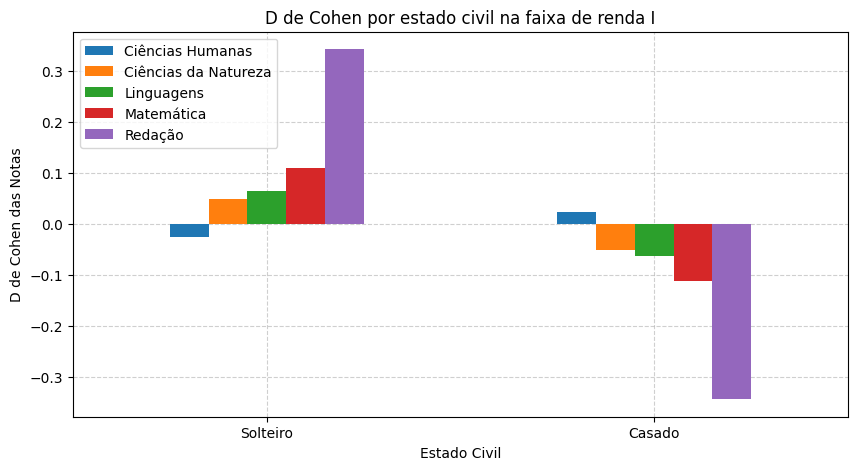

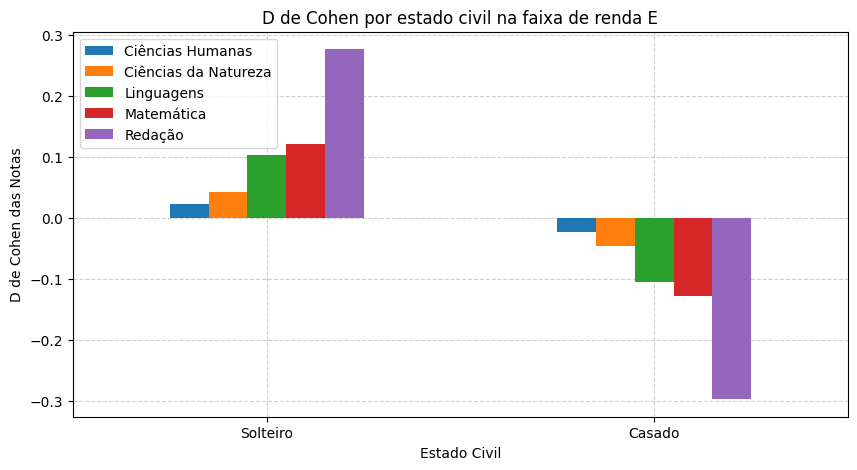

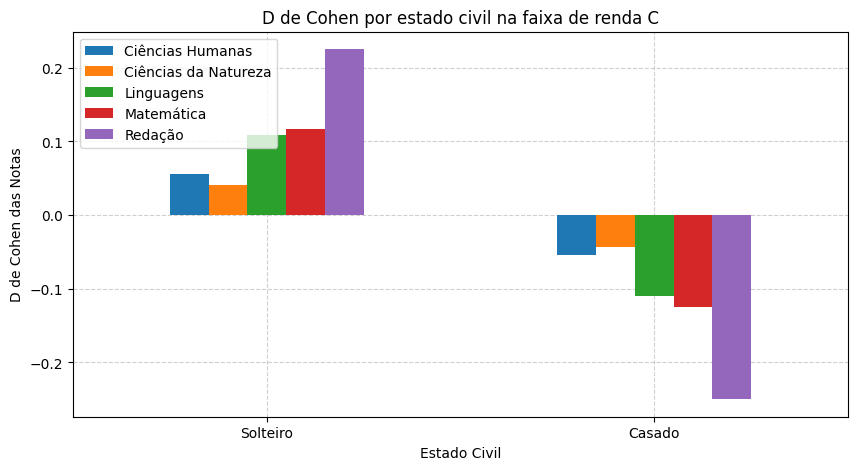

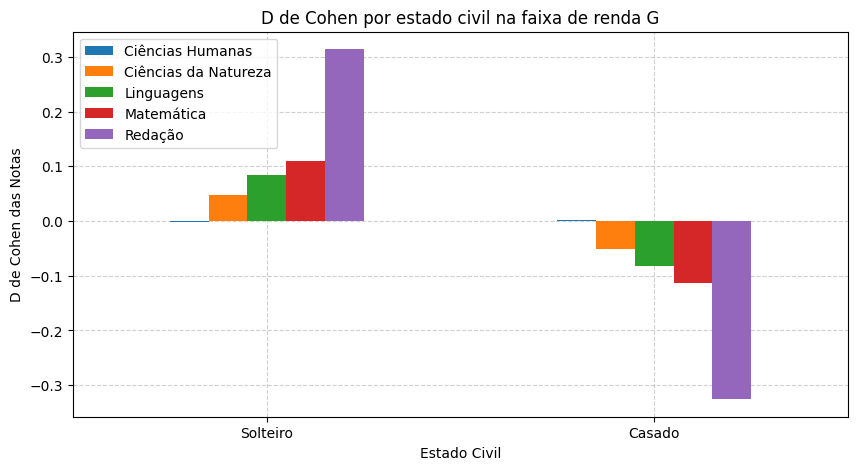

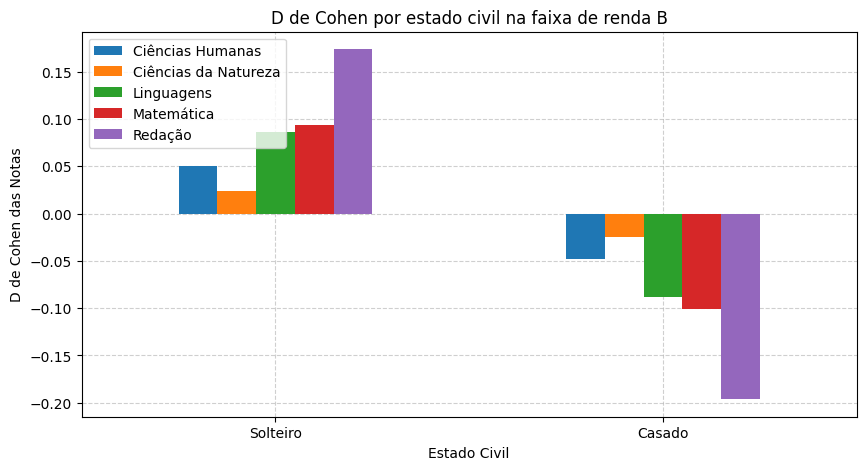

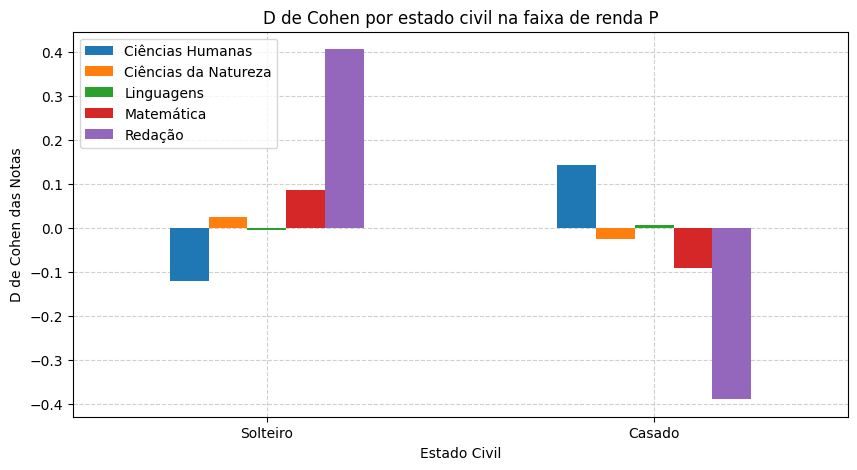

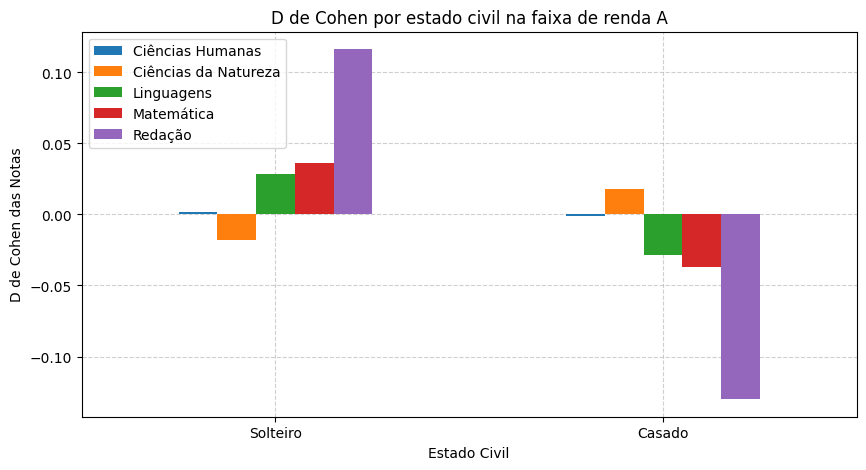

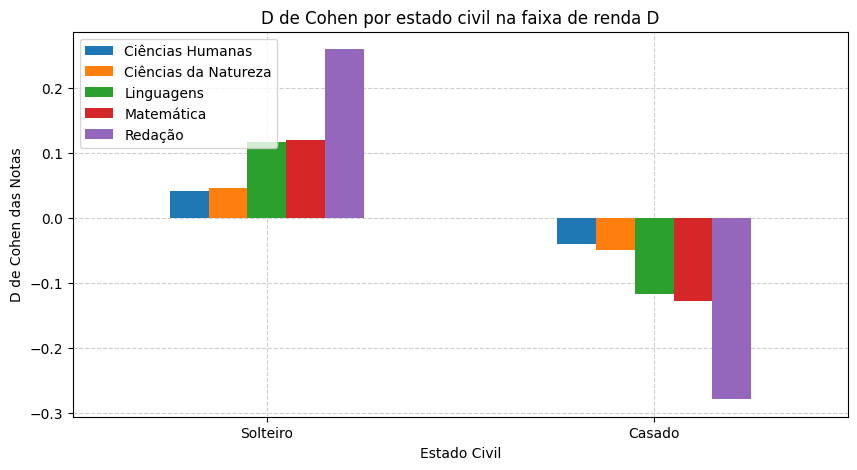

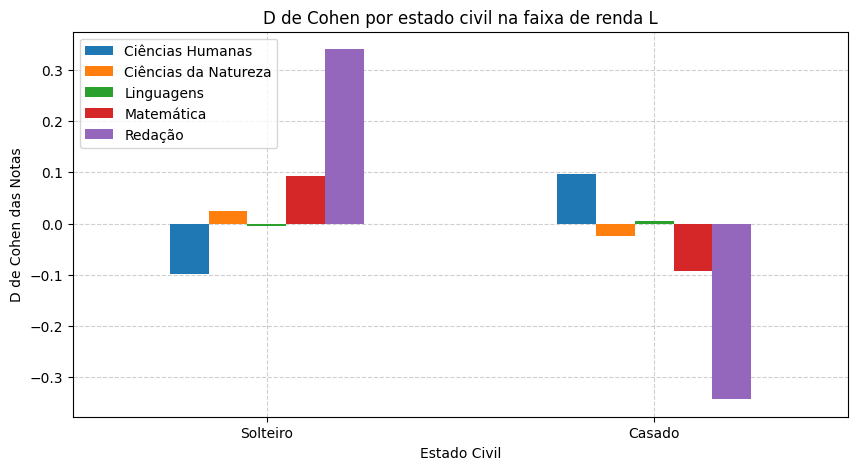

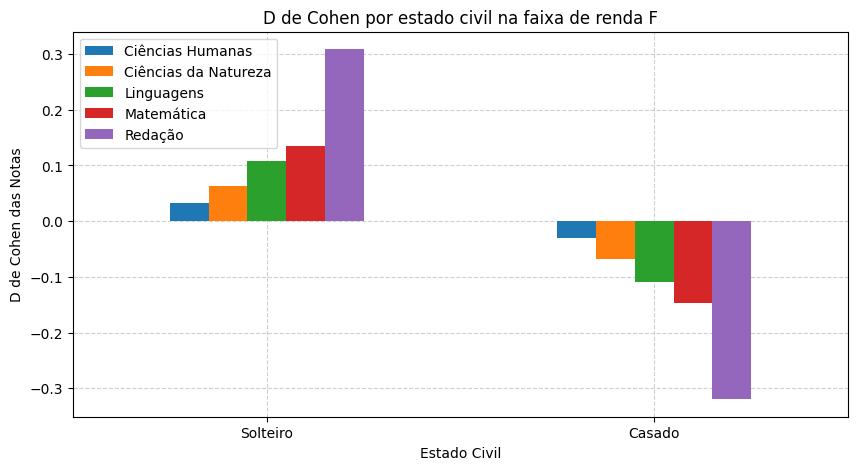

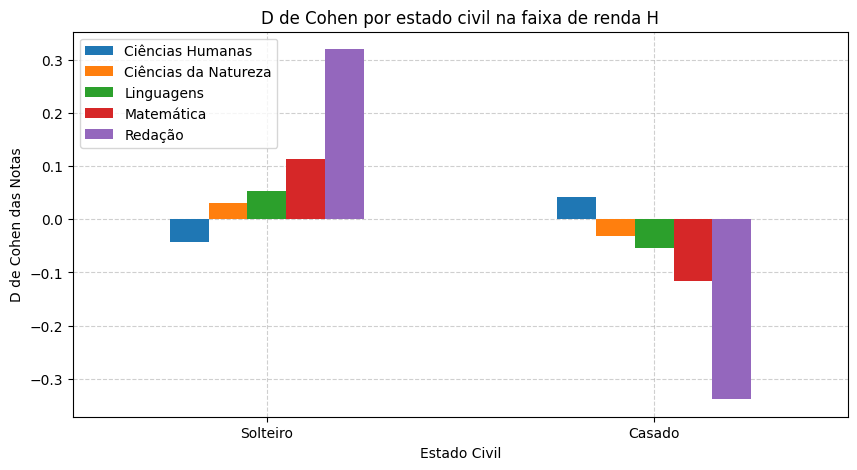

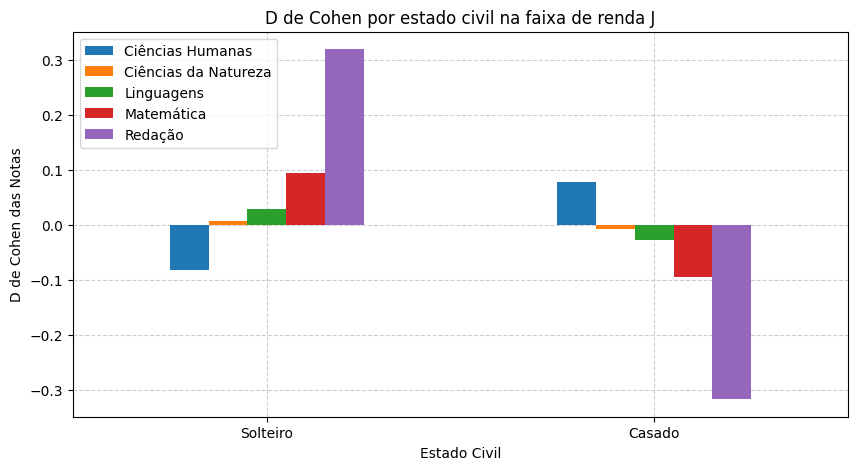

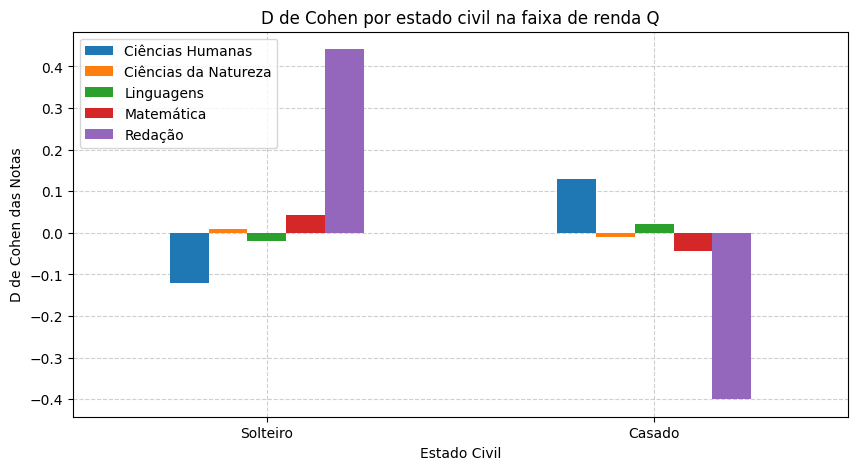

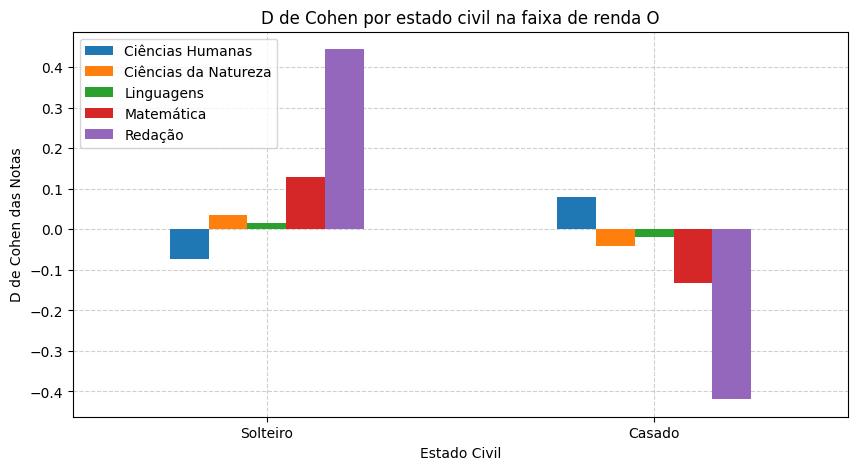

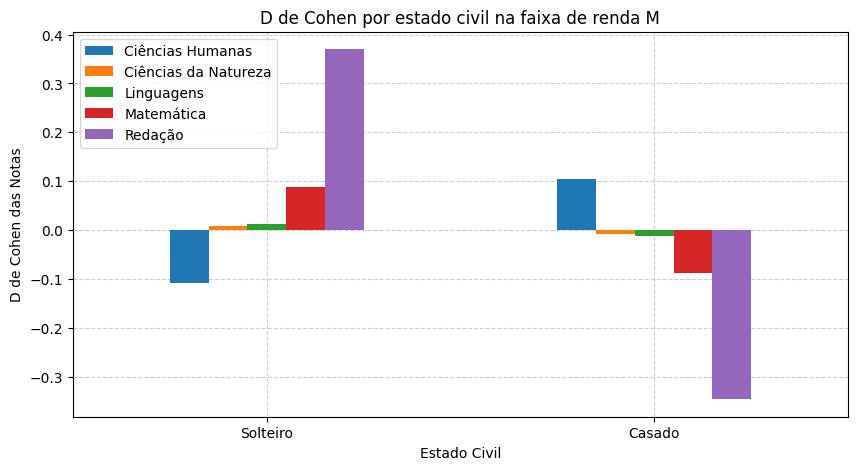

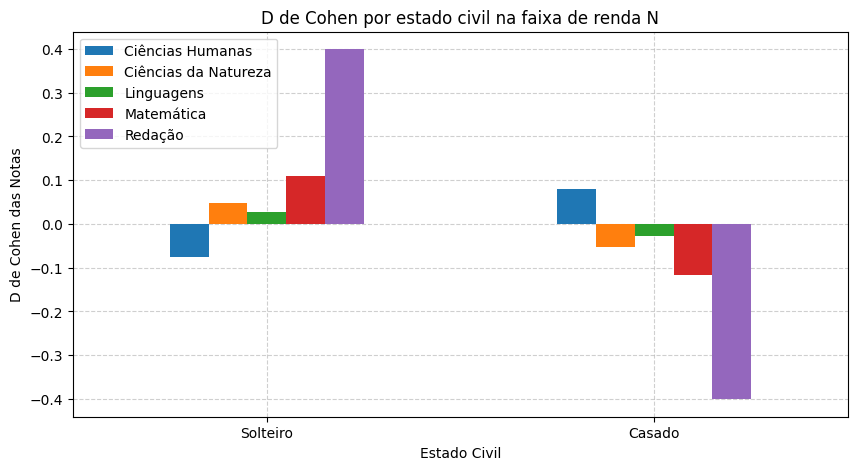

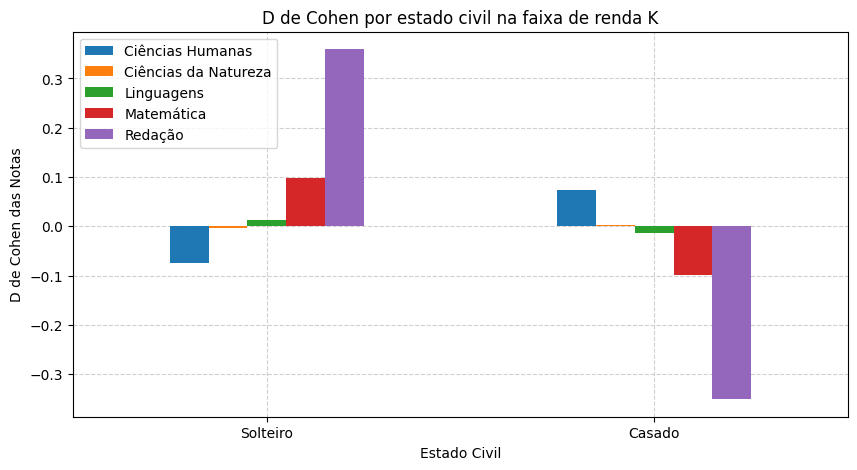

In [56]:
estado_civil = [
    "Solteiro",
    "Casado"
]

df_estado_civil=mcdados_filtrado[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q006","TP_ESTADO_CIVIL"]]

df_filtros_solteiros = df_estado_civil['TP_ESTADO_CIVIL']==1
df_filtro_casados = df_estado_civil['TP_ESTADO_CIVIL']==2

df_estado_civil = df_estado_civil[df_filtro_casados | df_filtros_solteiros]

rendas=set(df_estado_civil['Q006'].tolist())
for renda in rendas:
    filtro_renda=df_estado_civil[df_estado_civil['Q006']==renda]
    sem_renda=filtro_renda[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","TP_ESTADO_CIVIL"]]


    media_por_EC=sem_renda.groupby("TP_ESTADO_CIVIL").mean()
    std_por_EC = sem_renda.groupby("TP_ESTADO_CIVIL").std()
    media_total = media_por_EC.mean()

    decohen = (media_por_EC - media_total)/std_por_EC


    decohen.plot.bar(stacked=False, figsize=(10,5),zorder=2)
    plt.grid(True,linestyle='--', zorder=1,alpha=0.6)
    plt.title(f"D de Cohen por estado civil na faixa de renda {renda}")
    plt.ylabel("D de Cohen das Notas")
    plt.xticks(range(len(estado_civil)),labels=estado_civil, rotation=0)
    plt.xlabel('Estado Civil')
    plt.locator_params(axis='y', nbins=10)
    plt.legend(['Ciências Humanas','Ciências da Natureza','Linguagens','Matemática','Redação'], loc="upper left")
    plt.show()


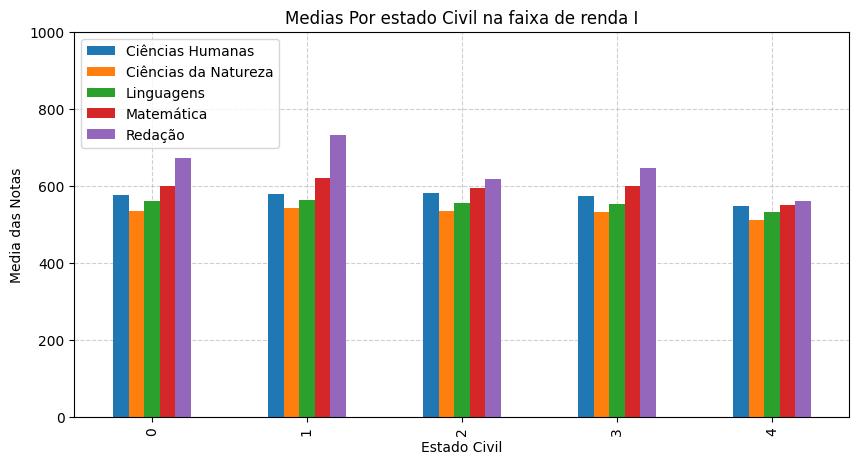

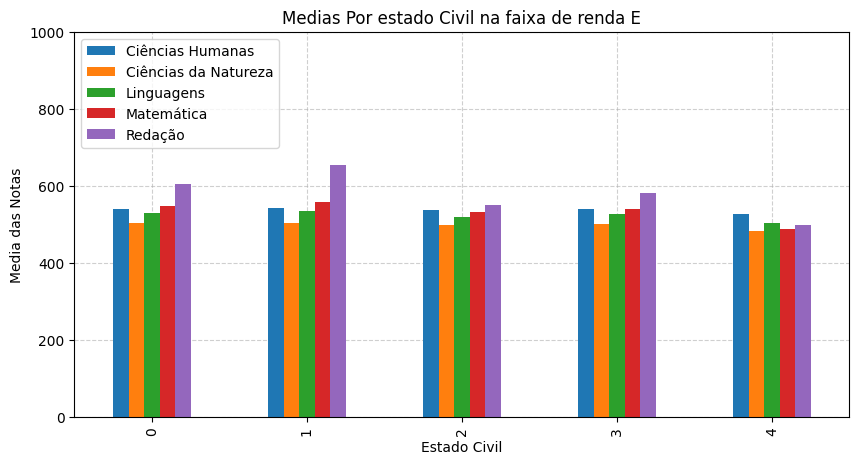

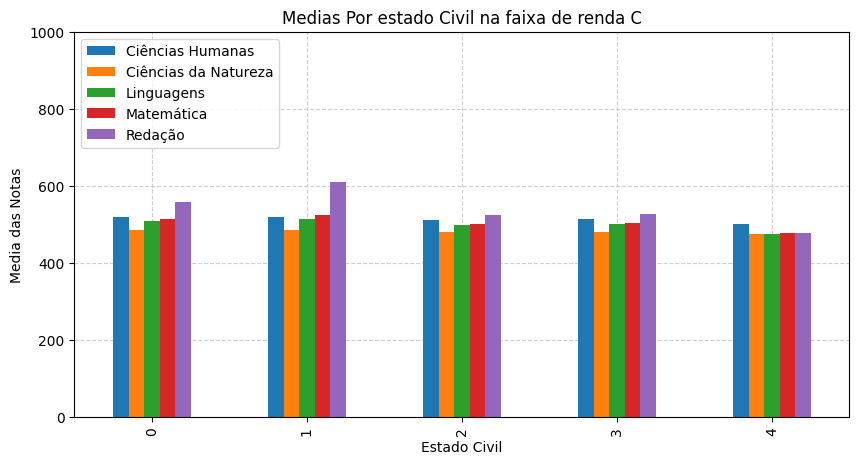

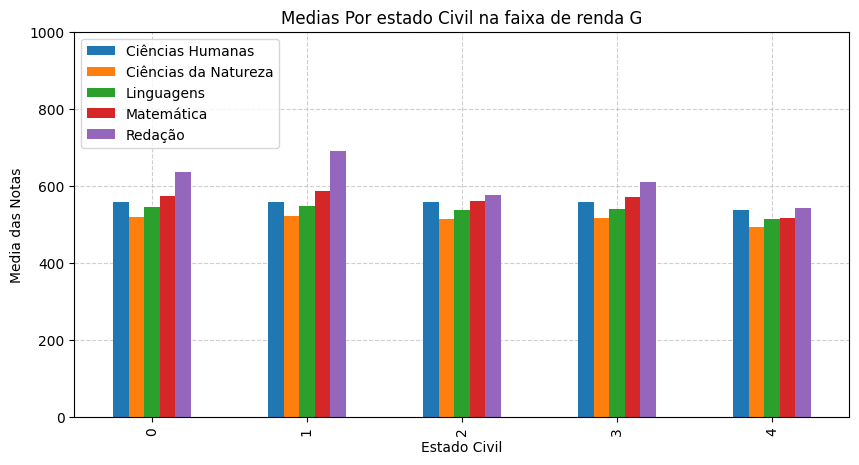

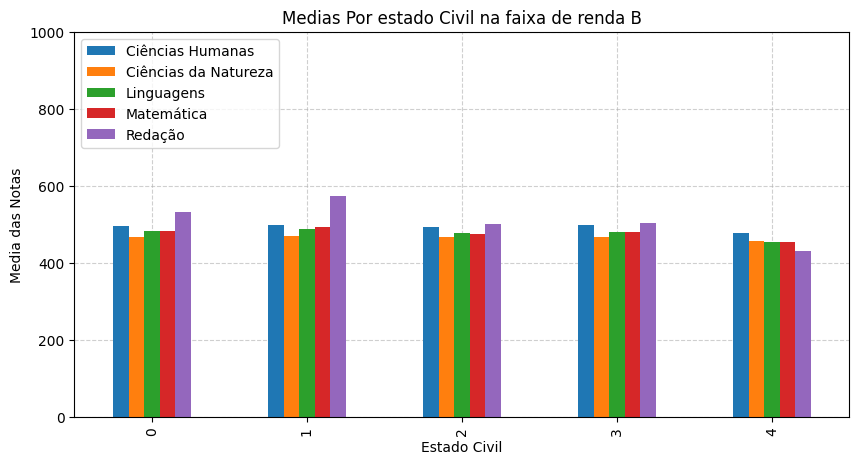

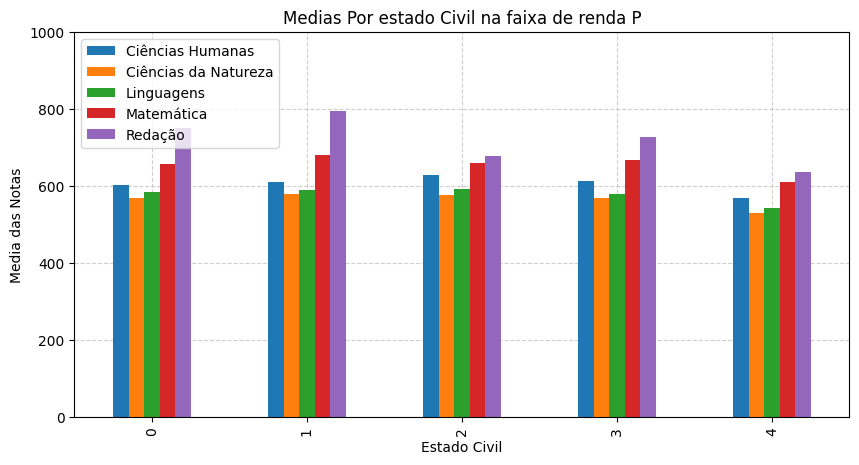

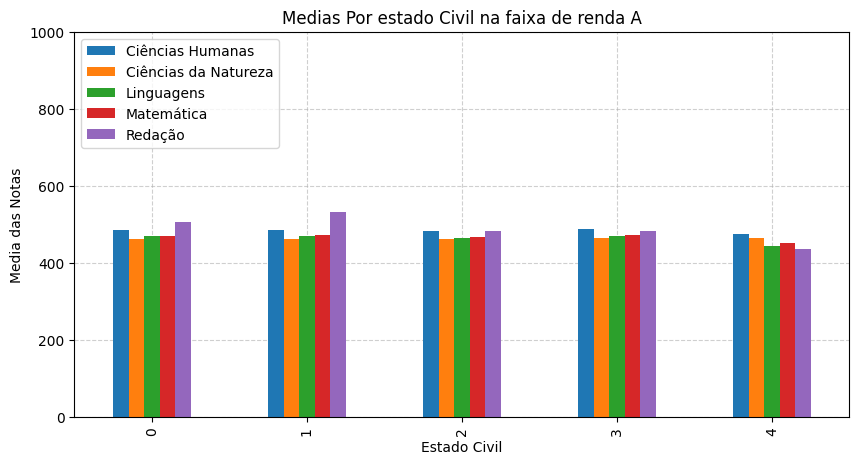

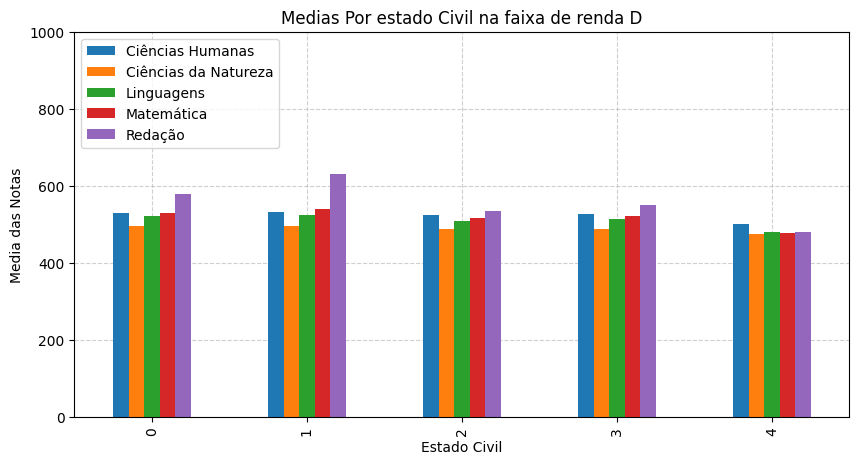

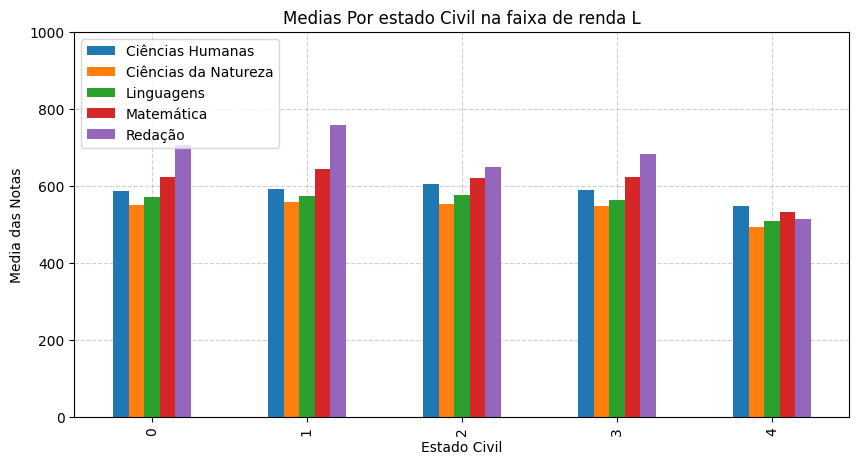

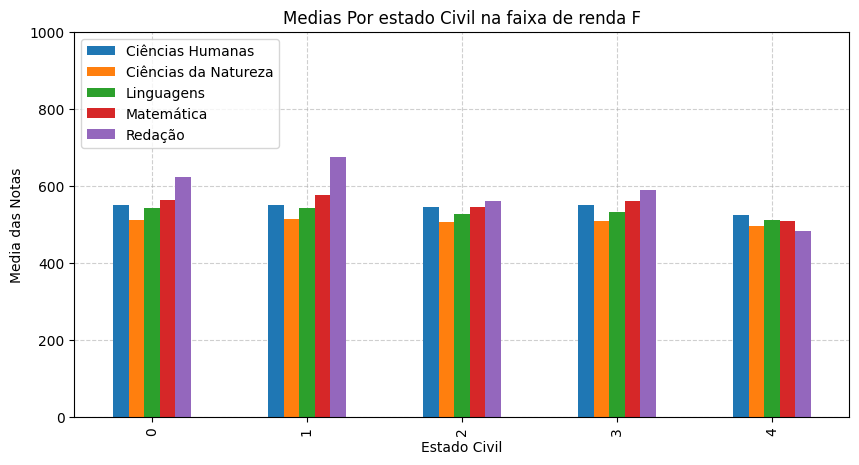

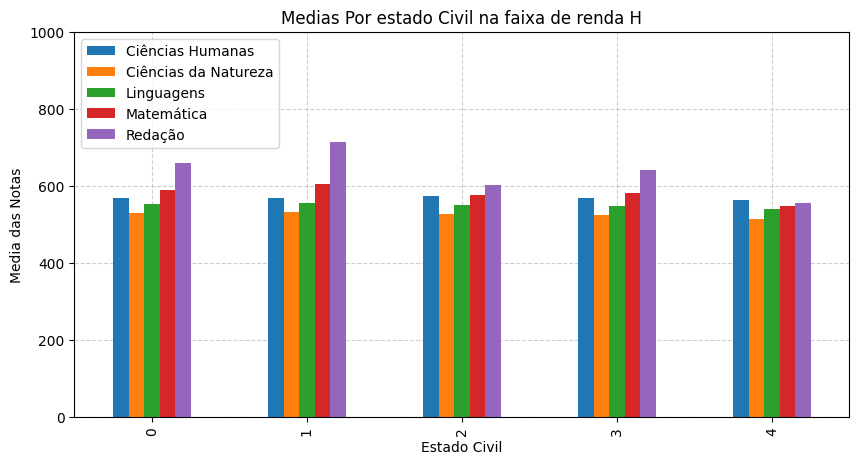

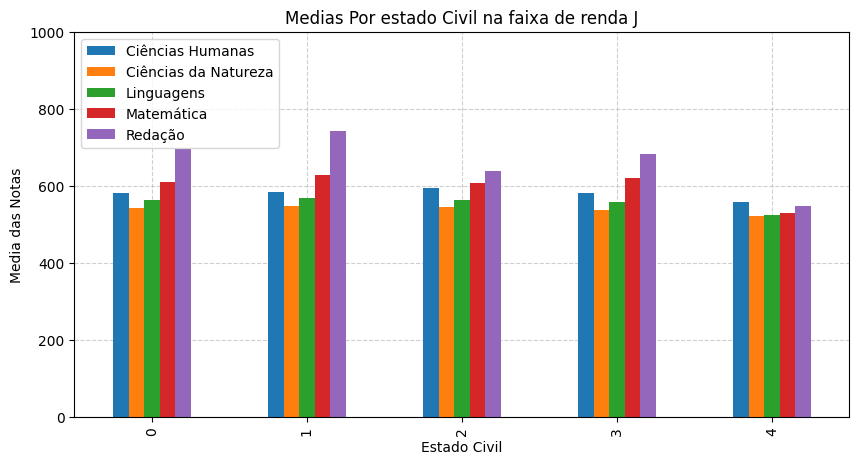

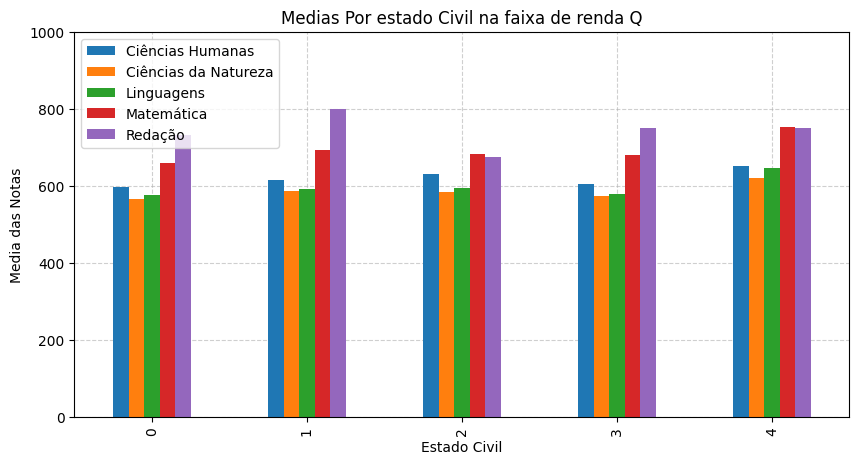

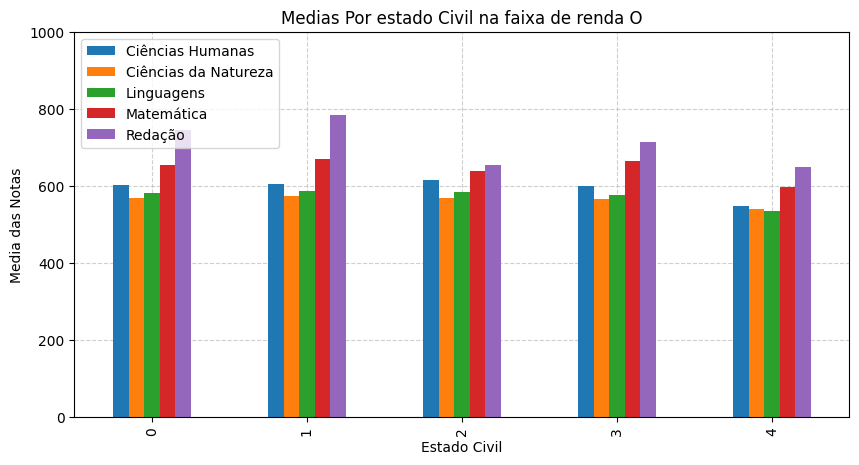

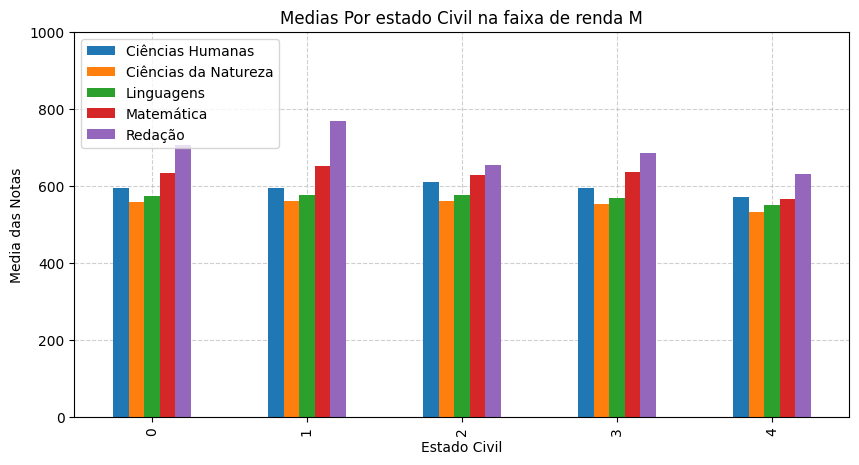

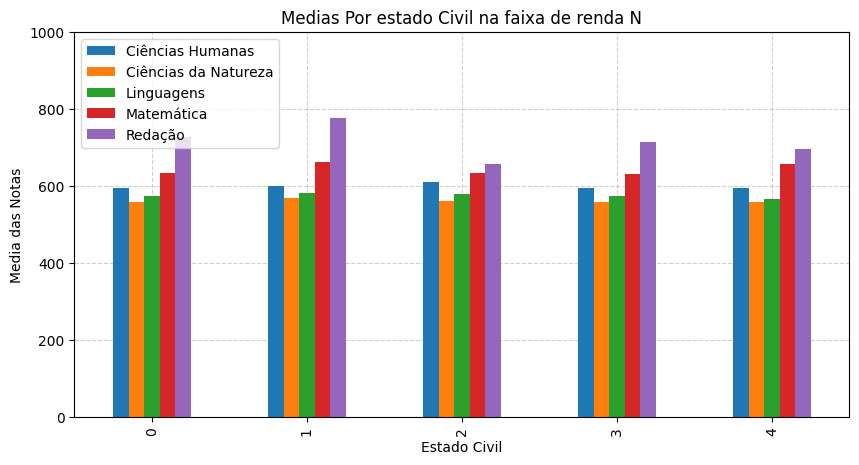

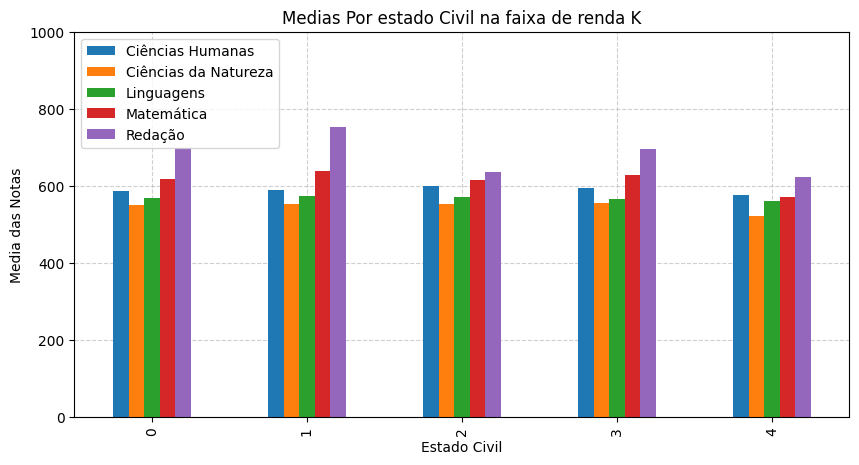

In [5]:
df_estado_civil=mcdados_filtrado[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","Q006","TP_ESTADO_CIVIL"]]

rendas=set(df_estado_civil['Q006'].tolist())

for renda in rendas:
    filtro_renda=df_estado_civil[df_estado_civil['Q006']==renda]
    sem_renda=filtro_renda[["NU_NOTA_CH","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","TP_ESTADO_CIVIL"]]
    media_por_EC=sem_renda.groupby("TP_ESTADO_CIVIL").mean()
    media_por_EC.plot.bar(stacked=False, figsize=(10,5),zorder=2, ylim=(0,1000))
    plt.grid(True,linestyle='--', zorder=1,alpha=0.6)
    plt.title(f"Medias Por estado Civil na faixa de renda {renda}")
    plt.ylabel("Media das Notas")
    plt.xlabel('Estado Civil')
    plt.legend(['Ciências Humanas','Ciências da Natureza','Linguagens','Matemática','Redação'], loc="upper left")
    plt.show()